<Axes: xlabel='Timestamp'>

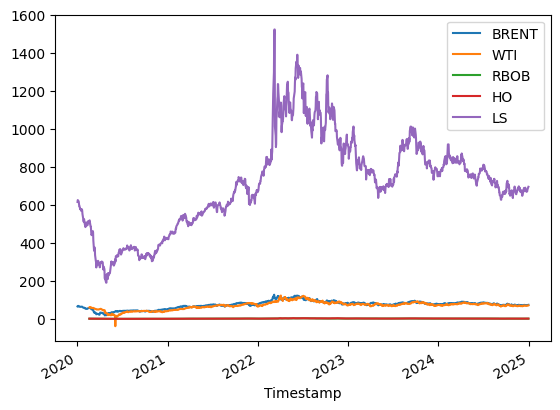

In [6]:
import pandas as pd

oil = pd.read_csv('Data/oil.csv', sep=";", decimal=",", date_format="%d/%m/%Y", index_col="Timestamp")
oil.plot()

<Axes: >

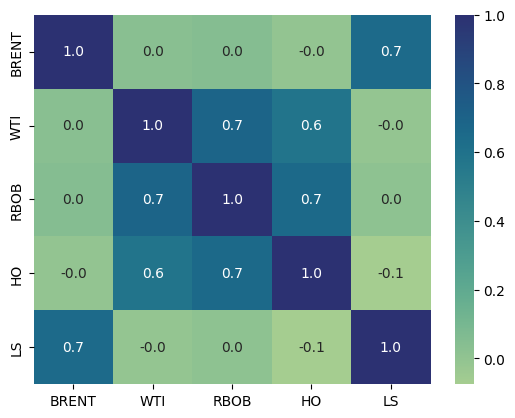

In [26]:
import seaborn as sns
import numfolio as nf
corr = nf.estimate_correlation(
    returns=oil.diff().dropna(),
    method="empyrical",
    rolling_window=5,
    n_bootstraps=100,
    n_jobs=4,
    min_length=20
)

sns.heatmap(corr, cmap="crest", annot=True, fmt=".1f")

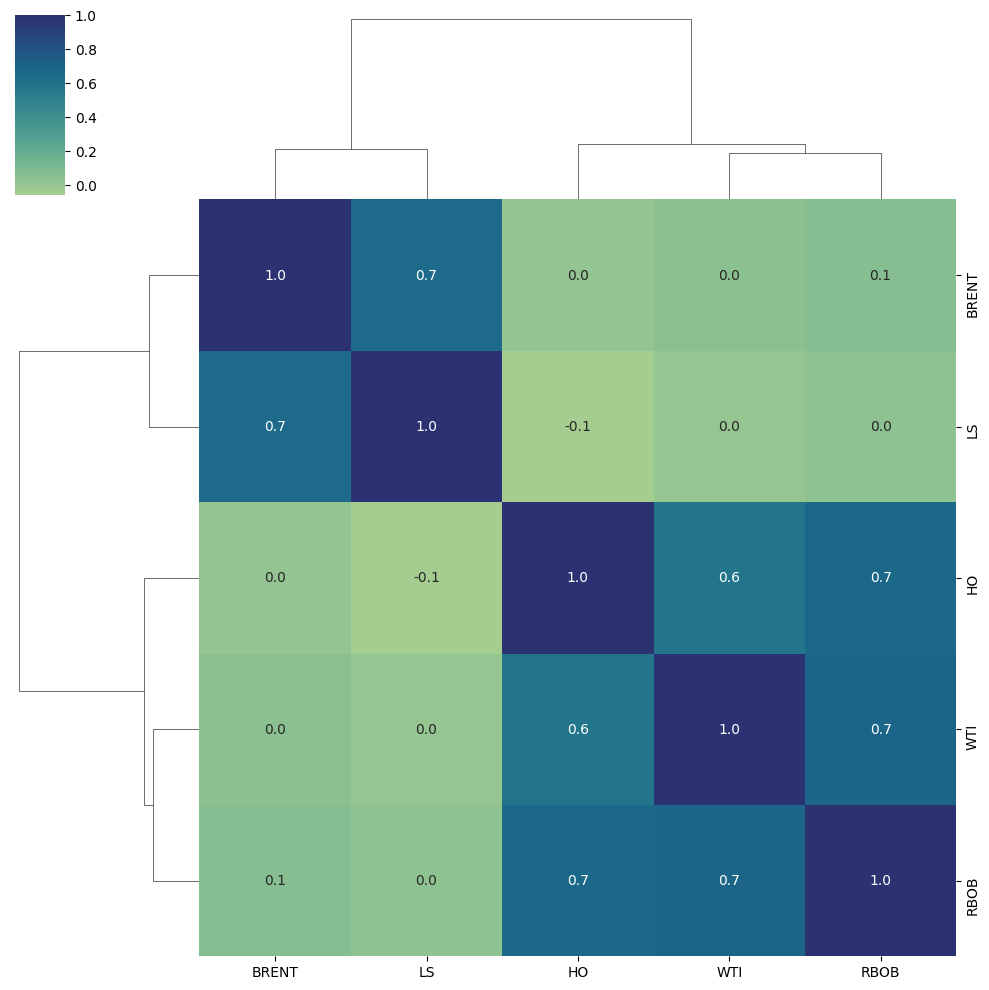